<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/%EA%B8%B0%EB%A7%90%EA%B3%A0%EC%82%AC20250613_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **기말고사(20250613)**
학번 : 2021152021            
성명 : 윤재원

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **문제 1) ANN Backpropagation**

In [ ]:
from collections.abc import MappingView
# Back-propagation of ANN with numpy
import numpy as np
import matplotlib.pyplot as plt

# Data Generation
np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)

# Target
y = 3 * x1 - 2 * x2 + x3

**1번 답안지**


최종 MSE: 1.1877
최종 MAPE: 279.17%


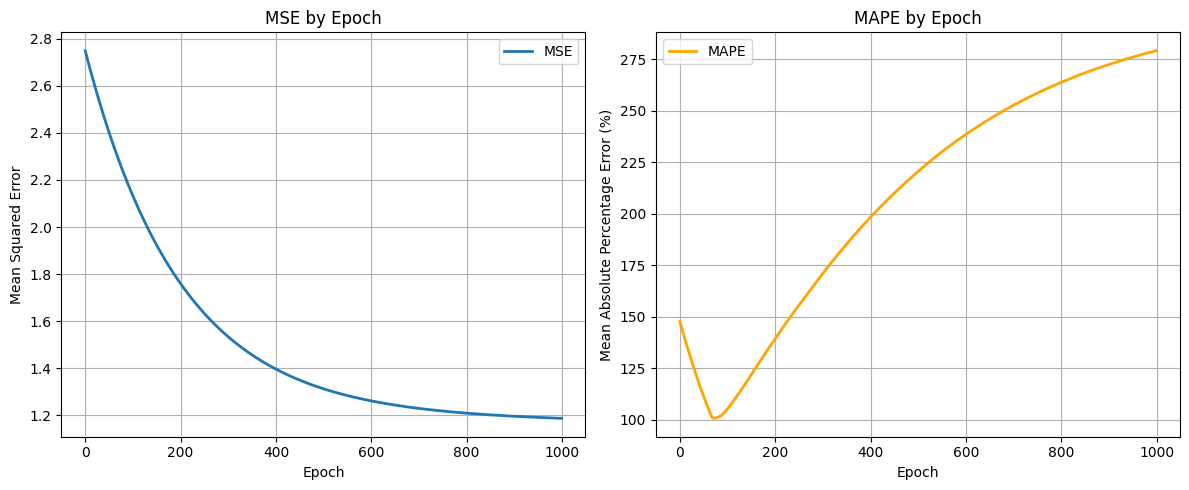

In [48]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
num_samples = 300

x1 = np.random.uniform(0, 1, num_samples)
x2 = np.random.uniform(0, 1, num_samples)
x3 = np.random.uniform(0, 1, num_samples)
X = np.stack((x1, x2, x3), axis=1)

y = (3 * x1 - 2 * x2 + x3).reshape(-1, 1)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def mape_loss(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

input_size = 3
hidden_size = 5
output_size = 1
lr = 0.001
epochs = 1000

W1 = np.random.randn(input_size, hidden_size) * np.sqrt(1. / input_size)
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * np.sqrt(1. / hidden_size)
b2 = np.zeros((1, output_size))

losses_mse = []
losses_mape = []

for epoch in range(epochs):

    z1 = X @ W1 + b1
    a1 = sigmoid(z1)
    z2 = a1 @ W2 + b2
    y_pred = z2

    loss_mse = mse_loss(y, y_pred)
    loss_mape = mape_loss(y, y_pred)
    losses_mse.append(loss_mse)
    losses_mape.append(loss_mape)

    dz2 = y_pred - y
    dW2 = a1.T @ dz2 / num_samples
    db2 = np.sum(dz2, axis=0, keepdims=True) / num_samples

    dz1 = (dz2 @ W2.T) * sigmoid_deriv(z1)
    dW1 = X.T @ dz1 / num_samples
    db1 = np.sum(dz1, axis=0, keepdims=True) / num_samples

    W2 -= lr * dW2
    b2 -= lr * db2
    W1 -= lr * dW1
    b1 -= lr * db1

print(f"\n최종 MSE: {losses_mse[-1]:.4f}")
print(f"최종 MAPE: {losses_mape[-1]:.2f}%")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(losses_mse, label='MSE', linewidth=2)
plt.title("MSE by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(losses_mape, label='MAPE', color='orange', linewidth=2)
plt.title("MAPE by Epoch")
plt.xlabel("Epoch")
plt.ylabel("Mean Absolute Percentage Error (%)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


# **문제 2) CNN**
- Data
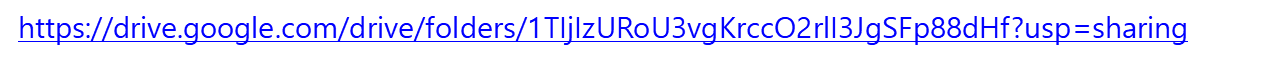

In [24]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [25]:
# 0,1,2,3,4, and 5 finger image data set

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_label.npy')

test_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_label.npy')

**2번** **답안지**

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - accuracy: 0.2217 - loss: 1.9348 - val_accuracy: 0.0000e+00 - val_loss: 3.3187
Epoch 2/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5578 - loss: 1.4207 - val_accuracy: 0.0556 - val_loss: 1.6858
Epoch 3/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8088 - loss: 0.5758 - val_accuracy: 0.9333 - val_loss: 0.2249
Epoch 4/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8791 - loss: 0.3262 - val_accuracy: 0.9333 - val_loss: 0.1934
Epoch 5/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9429 - loss: 0.1877 - val_accuracy: 0.9444 - val_loss: 0.1704
Epoch 6/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9508 - loss: 0.1911 - val_accuracy: 0.9333 - val_loss: 0.2031
Epoch 7/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9727 - loss: 0.1366 - val_accuracy: 0.9222 - val_loss: 0.2060
Epoch 8/10
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9773 - loss: 0.0909 - val_accuracy: 0.9333 - val_loss

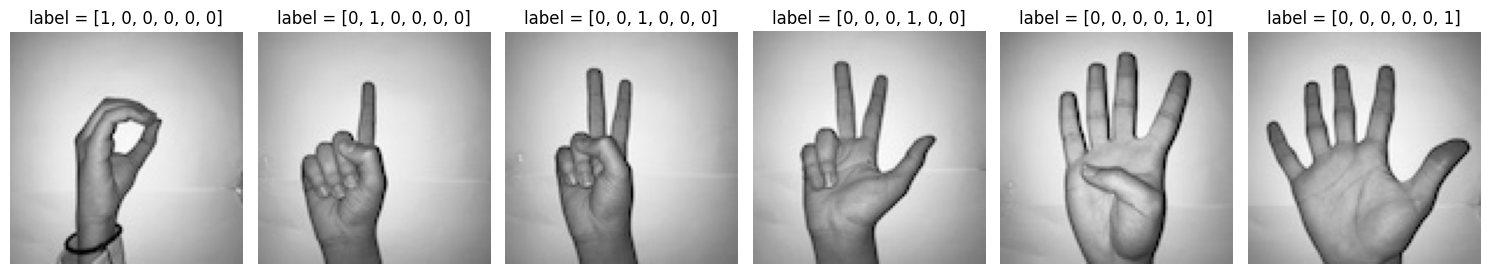

In [47]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_img.npy')
train_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_train_label.npy')
test_x = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_img.npy')
test_y = np.load('/content/drive/MyDrive/Colab Notebooks/Finger_test_label.npy')

train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0
train_x = np.expand_dims(train_x, axis=-1)  # (N, 100, 100, 1)
test_x = np.expand_dims(test_x, axis=-1)

num_classes = train_y.shape[1] if len(train_y.shape) > 1 else len(np.unique(train_y))

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_x, train_y,
                    epochs=10,
                    batch_size=32,
                    validation_split=0.1,
                    verbose=1)

test_loss, test_acc = model.evaluate(test_x, test_y, verbose=0)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")

pred_y = model.predict(test_x)
pred_classes = np.argmax(pred_y, axis=1)

test_len = test_x.shape[0]
step = test_len // num_classes
indices = [i * step for i in range(num_classes)]

plt.figure(figsize=(15, 5))
for idx, i in enumerate(indices):
    plt.subplot(1, num_classes, idx + 1)
    plt.imshow(test_x[i].reshape(100, 100), cmap='gray')
    plt.axis('off')

    one_hot = [0] * num_classes
    one_hot[pred_classes[i]] = 1

    plt.title(f'label = {one_hot}')
plt.tight_layout()
plt.show()


# **문제 3) K-means clustering**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

**3번** **답안지**

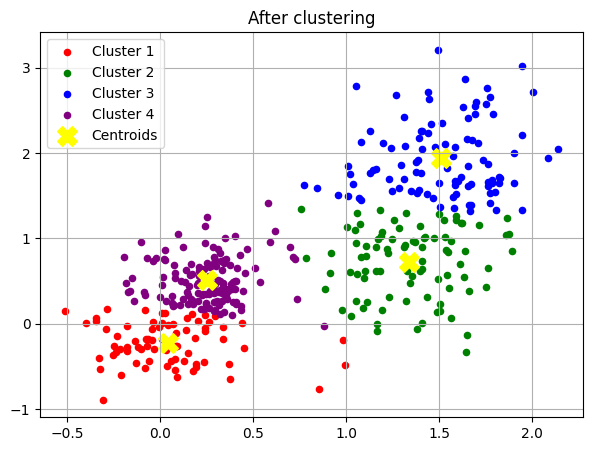

In [46]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
data1 = np.array((np.random.normal(0, 0.2, 100), np.random.normal(0.0, 0.4, 100)))
data2 = np.array((np.random.normal(1.2, 0.3, 100), np.random.normal(1.1, 0.7, 100)))
data3 = np.array((np.random.normal(1.6, 0.2, 100), np.random.normal(1.8, 0.7, 100)))
data4 = np.array((np.random.normal(0.3, 0.1, 100), np.random.normal(0.5, 0.3, 100)))

X = np.hstack((data1, data2, data3, data4)).T

def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2, axis=1))

def kmeans(X, k, init_centroids, max_iters=100):
    centroids = init_centroids.copy()
    for _ in range(max_iters):

        labels = np.array([np.argmin([np.linalg.norm(x - c) for c in centroids]) for x in X])

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

init_centroids = np.array([
    data1.mean(axis=1),
    data2.mean(axis=1),
    data3.mean(axis=1),
    data4.mean(axis=1)
])

distortions = []
K_range = range(1, 10)
for k in K_range:
    if k == 4:
        centroids, labels = kmeans(X, k, init_centroids)
    else:
        random_idx = np.random.choice(len(X), k, replace=False)
        random_init = X[random_idx]
        centroids, labels = kmeans(X, k, random_init)

    distortion = sum(np.min([np.linalg.norm(x - c) ** 2 for c in centroids]) for x in X) / len(X)
    distortions.append(distortion)

centroids, labels = kmeans(X, 4, init_centroids)

plt.figure(figsize=(7, 5))
colors = ['red', 'green', 'blue', 'purple']
for i in range(4):
    cluster = X[labels == i]
    plt.scatter(cluster[:, 0], cluster[:, 1], s=20, color=colors[i], label=f'Cluster {i+1}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='yellow', marker='X', label='Centroids')
plt.title('After clustering')
plt.legend()
plt.grid(True)
plt.show()